In [1]:
!nvidia-smi

Mon Nov  2 16:45:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.152.00   Driver Version: 418.152.00   CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:01:00.0 Off |                  N/A |
|  0%   32C    P8     6W / 200W |     10MiB /  8118MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!pip install tensorflow-gpu

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
     |████████████████████████████████| 320.4 MB 11 kB/s s eta 0:00:01    |█▏                              | 12.0 MB 20.7 MB/s eta 0:00:15     |██████▊                         | 67.5 MB 24.5 MB/s eta 0:00:11     |███████▊                        | 77.2 MB 24.5 MB/s eta 0:00:10     |█████████▊                      | 97.5 MB 22.2 MB/s eta 0:00:11     |██████████                      | 99.7 MB 22.2 MB/s eta 0:00:10     |██████████▌                     | 105.1 MB 17.5 MB/s eta 0:00:13     |█████████████████▍              | 174.6 MB 24.8 MB/s eta 0:00:06     |█████████████████▉              | 178.3 MB 24.8 MB/s eta 0:00:06     |███████████████████▍            | 193.8 MB 1.6 MB/s eta 0:01:19     |███████████████████████████████▋| 316.9 MB 20.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
#tf.random.set_random_seed(1)
tf.random.set_random_seed(RANDOM_SEED)

/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework

In [2]:
#!gdown --id 152sWECukjvLerrVG2NUO8gtMFg83RKCF --output WISDM_ar_latest.tar.gz
#!tar -xvf WISDM_ar_latest.tar.gz

In [2]:
column_names = ['x', 'y', 'z', 'label']

df = pd.read_csv('data/labeled_data.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,시간(ms),이름,허리인치,키,회차,낙상종류,방향,x,y,z,label
0,0,0.0,45020.0,이종모,75kg,168.0,1.0,걷기,보통,-1030.0,13760.0,5248.0,0
1,1,1.0,45089.0,이종모,75kg,168.0,1.0,걷기,보통,-2502.0,9792.0,2880.0,0
2,2,2.0,45114.0,이종모,75kg,168.0,1.0,걷기,보통,-3526.0,9984.0,3008.0,0
3,3,3.0,45168.0,이종모,75kg,168.0,1.0,걷기,보통,-1926.0,12032.0,3776.0,0
4,4,4.0,45193.0,이종모,75kg,168.0,1.0,걷기,보통,121.0,14464.0,3904.0,0


In [4]:
df.shape

(81907, 13)

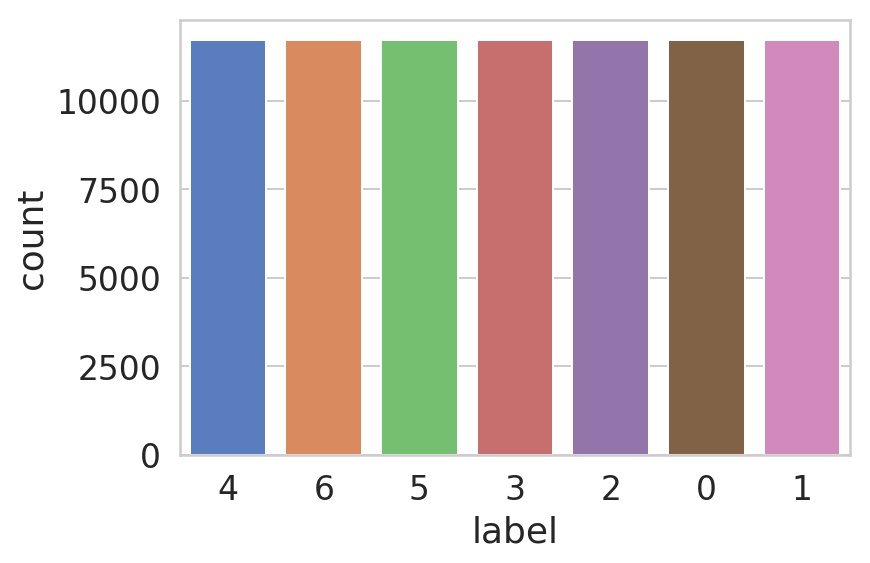

In [5]:
sns.countplot(x = 'label',
              data = df,
              order = df.label.value_counts().index);

In [7]:
def plot_activity(activity, df):
    data = df[df['label'] == activity][['x', 'y', 'z']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

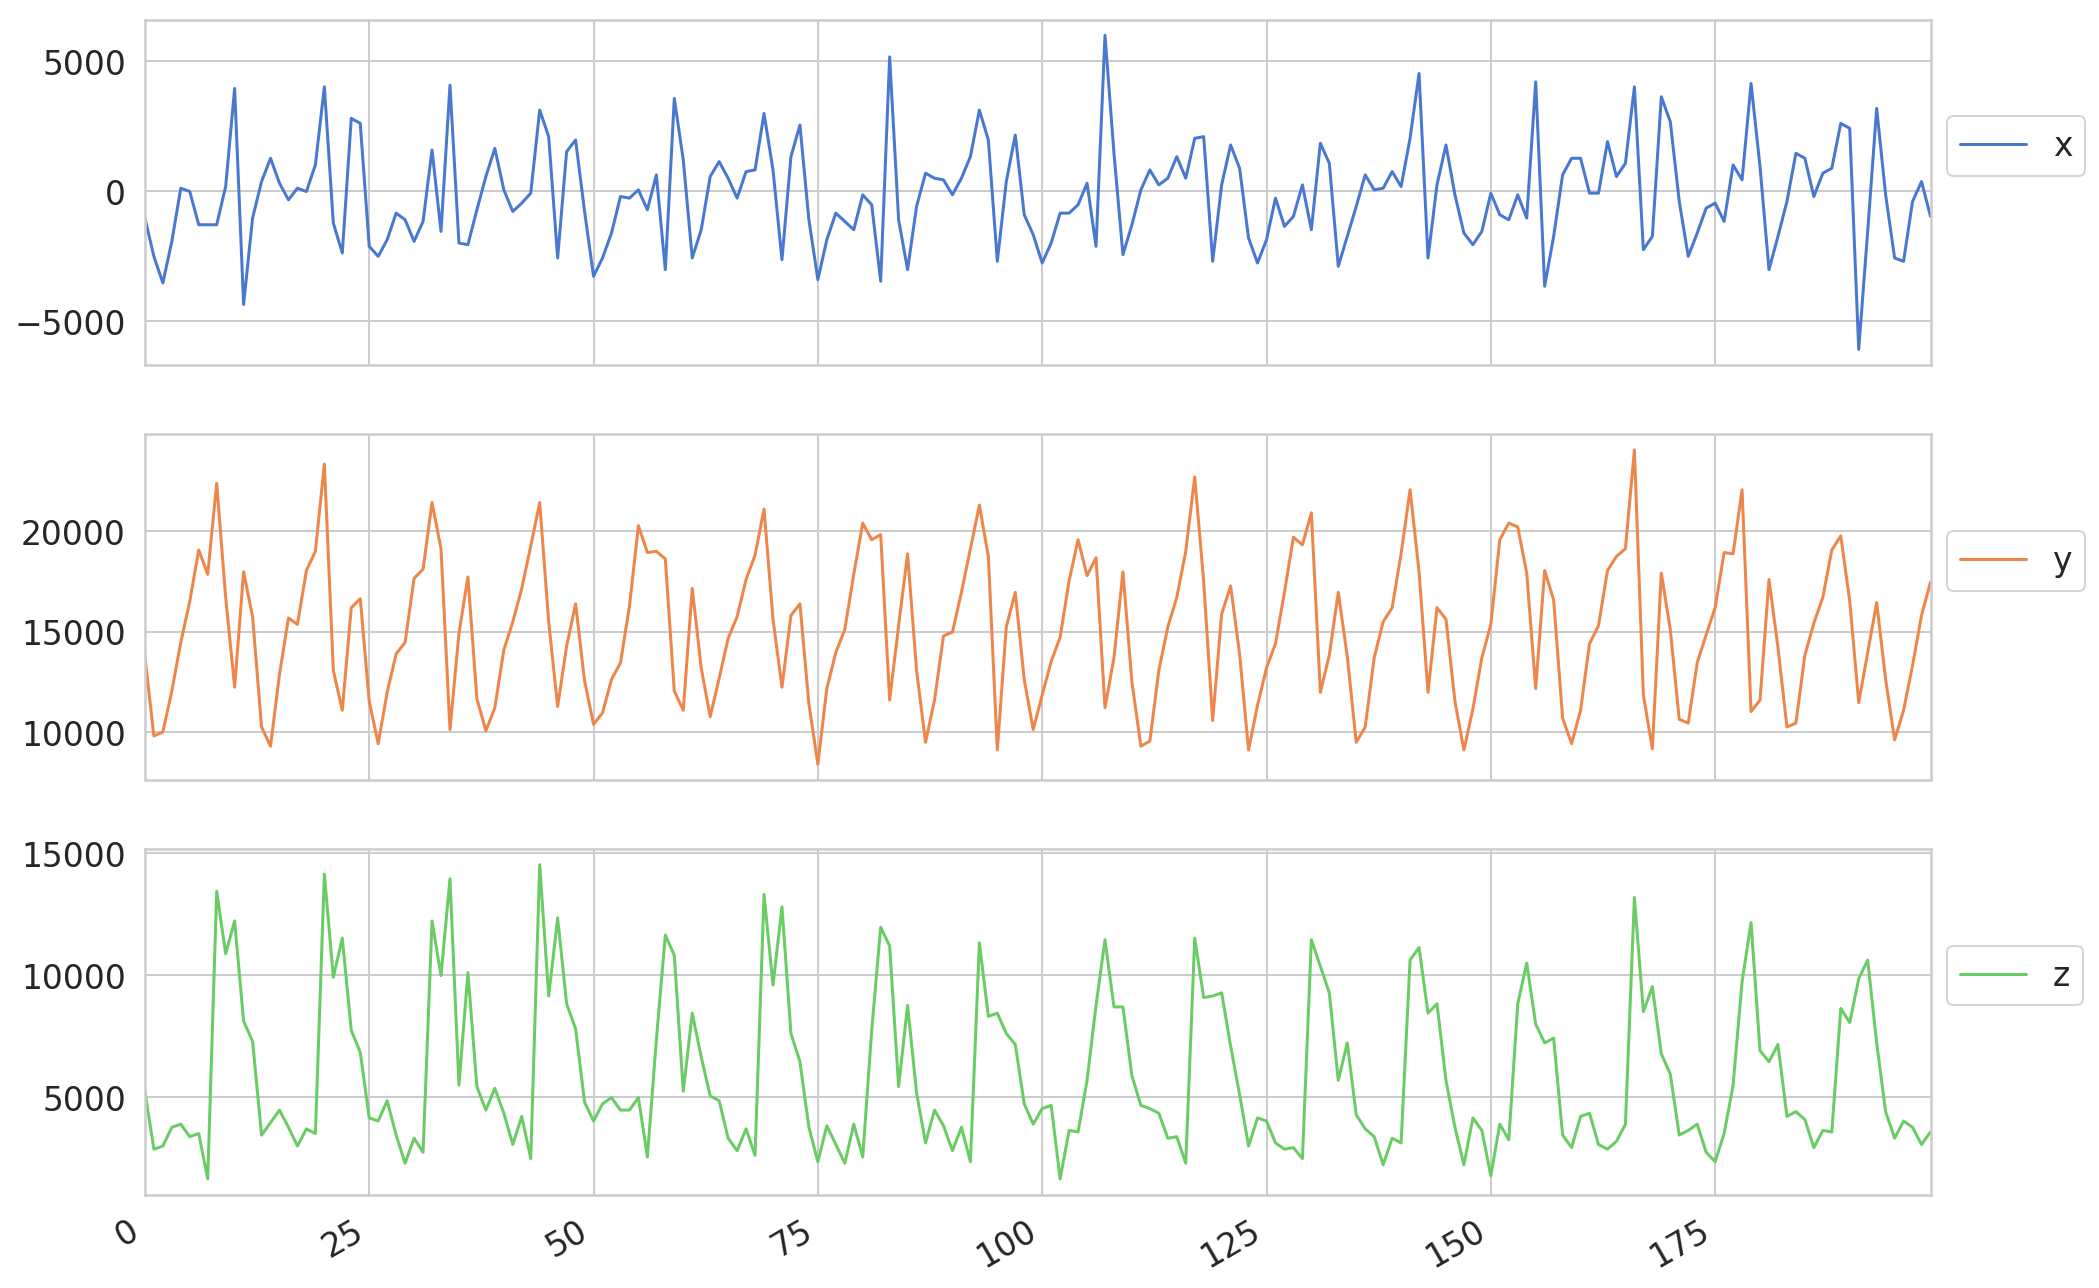

In [8]:
plot_activity(0, df);

In [3]:
traindf = pd.read_csv('data/train_data.csv').fillna(method='pad')
testdf = pd.read_csv('data/test_data.csv').fillna(method='pad')

In [4]:
df_train=traindf
df_test=testdf

In [5]:
from sklearn.preprocessing import RobustScaler

scale_columns = ['x', 'y', 'z']

scaler = RobustScaler()

scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())

In [6]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 39
STEP = 13

X_train, y_train = create_dataset(
    df_train[['x', 'y', 'z']], 
    df_train.label, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x', 'y', 'z']], 
    df_test.label, 
    TIME_STEPS, 
    STEP
)

In [7]:
print(X_train.shape, y_train.shape)

(3598, 39, 3) (3598, 1)


In [8]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [9]:
print(X_train.shape, y_train.shape)

(3598, 39, 3) (3598, 5)


In [10]:
def evaluate_model(X_train, y_train, testX, testy,verbose, epochs, batch_size):
    #verbose, epochs, batch_size = 1, 50, 32
    model = keras.Sequential()
    model.add(
        keras.layers.Bidirectional(
          keras.layers.LSTM(
              units=100, 
              input_shape=[X_train.shape[1], X_train.shape[2]]
          )
        )
    )
    model.add(keras.layers.Dropout(rate=0.5))
    model.add(keras.layers.Dense(units=5, activation='relu'))

    model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    # fit network
    
    
    history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, train_acc = model.evaluate(X_train, y_train,batch_size=batch_size, verbose=1)
    
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return  epochs, batch_size,accuracy,train_acc
def summarize_results(scores):
    
    print(scores)
    m, s = np.mean(scores), np.std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
def run_experiment(trainX, trainy, testX, testy,batch):
    # load data
    ##trainX, trainy, testX, testy = load_dataset()
    
    # repeat experiment
    scores = list()
    epochmap={2:100,13:500,39:500,117:900,234:1000,486:1500,729:2000}
    for r,batch in enumerate([2,39,117,234,486,729]):
        epochs, batch_size,testscore,trainacc = evaluate_model(trainX, trainy, testX, testy,0,epochmap[batch],batch)
        testscore = testscore * 100.0
        trainacc=trainacc*100.0
        print( "epoch:",epochs,"/batch_size:", batch_size)
        print('test>#%d: %.3f' % (r+1, testscore))
        print('train>#%d: %.3f' % (r+1, trainacc))
        scores.append(testscore)
    # summarize results
    summarize_results(scores)

    # run the experiment
    #run_experiment()

In [ ]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 100-20 243-117

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
3598/3598 [==============================] - 18s 5ms/sample - loss: 0.0056 - acc: 0.9983
epoch: 100 /batch_size: 2
test>#1: 89.075
train>#1: 99.833
3598/3598 [==============================] - 1s 405us/sample - loss: 9.7714e-05 - acc: 1.0000
epoch: 500 /batch_size: 39
test>#2: 89.744
train>#2: 100.000
3598/3598 [==============================] - 1s 286us/sample - loss: 0.0150 - acc: 0.9942
epoch: 900 /batch_size: 117
test>#3: 85.061
train>#3: 99.416
3598/3598 [==============================] - 1s 215us/sample - loss: 4.6516e-06 - acc: 1.0000
epoch: 1000 /batch_size: 234
test>#4: 87.179
train>#4: 100.000
3598/3598 [==============================] - 1s 291us/sample - loss: 2.1109e-04 - acc: 1.0000
epoch: 1500 /batch_size: 486
test>#5: 86.065
train>#5: 100.0

In [11]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 100-20 243-117

3598/3598 [==============================] - 18s 5ms/sample - loss: 0.0210 - acc: 0.9961
epoch: 100 /batch_size: 2
test>#1: 87.514
train>#1: 99.611
3598/3598 [==============================] - 2s 609us/sample - loss: 4.3340e-05 - acc: 1.0000
epoch: 500 /batch_size: 39
test>#2: 88.183
train>#2: 100.000
3598/3598 [==============================] - 1s 196us/sample - loss: 3.6922e-06 - acc: 1.0000
epoch: 900 /batch_size: 117
test>#3: 88.071
train>#3: 100.000
3598/3598 [==============================] - 1s 188us/sample - loss: 5.3796e-06 - acc: 1.0000
epoch: 1000 /batch_size: 234
test>#4: 86.065
train>#4: 100.000
3598/3598 [==============================] - 1s 183us/sample - loss: 0.0383 - acc: 0.9892
epoch: 1500 /batch_size: 486
test>#5: 84.504
train>#5: 98.916
3598/3598 [==============================] - 1s 194us/sample - loss: 0.0156 - acc: 0.9953
epoch: 2000 /batch_size: 729
test>#6: 83.612
train>#6: 99.528
[87.51393556594849, 88.18283081054688, 88.07134628295898, 86.06466054916382, 84.

### Bi-LSTM _ Highest Accuracy : 91.19%
- epoch 500 batch_size:39
- timestamp - step: 39-13
- nodes: 100-20

In [11]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 100-20 243-117

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
3598/3598 [==============================] - 15s 4ms/sample - loss: 0.0126 - acc: 0.9981
epoch: 100 /batch_size: 2
test>#1: 88.294
train>#1: 99.805
3598/3598 [==============================] - 1s 367us/sample - loss: 3.6949e-04 - acc: 1.0000
epoch: 500 /batch_size: 39
test>#2: 91.193
train>#2: 100.000
3598/3598 [==============================] - 1s 253us/sample - loss: 3.0258e-06 - acc: 1.0000
epoch: 900 /batch_size: 117
test>#3: 88.963
train>#3: 100.000


KeyError: 243

### Highest Accuracy 73.50
epoch 2000 batch size 117 BiLSTM 50-100

In [10]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-100 243-117

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
398/398 [==============================] - 1s 1ms/sample - loss: 2.8801e-05 - acc: 1.0000
epoch: 2000 /batch_size: 39
test>#1: 68.367
train>#1: 100.000
398/398 [==============================] - 0s 847us/sample - loss: 0.0013 - acc: 1.0000
epoch: 2000 /batch_size: 117
test>#2: 73.469
train>#2: 100.000
398/398 [==============================] - 0s 903us/sample - loss: 3.7682e-04 - acc: 1.0000
epoch: 2000 /batch_size: 243
test>#3: 71.429
train>#3: 100.000
398/398 [==============================] - 0s 925us/sample - loss: 0.0934 - acc: 0.9824
epoch: 2000 /batch_size: 486
test>#4: 59.184
train>#4: 98.241
398/398 [==============================] - 0s 994us/sample - loss: 0.0026 - acc: 1.0000
epoch: 2000 /batch_size: 729
test>#5: 69.388
train>#5: 100.000
[68.36

### Highest Accuracy 71.43 
Bi-LSTM (50-100 dropout 0.5)
epoch 1000
batch-size 486

In [20]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-100 243-117

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
398/398 [==============================] - 1s 1ms/sample - loss: 0.4203 - acc: 0.8643
epoch: 1000 /batch_size: 117
test>#1: 50.000
train>#1: 86.432
398/398 [==============================] - 0s 1ms/sample - loss: 0.3074 - acc: 0.9095
epoch: 1000 /batch_size: 243
test>#2: 53.061
train>#2: 90.955
398/398 [==============================] - 1s 1ms/sample - loss: 0.0910 - acc: 0.9849
epoch: 1000 /batch_size: 486
test>#3: 71.429
train>#3: 98.492
398/398 [==============================] - 1s 2ms/sample - loss: 0.4227 - acc: 0.8467
epoch: 1000 /batch_size: 729
test>#4: 54.082
train>#4: 84.673
[50.0, 53.06122303009033, 71.42857313156128, 54.08163070678711]
Accuracy: 57.143% (+/-8.384)


In [11]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
400/400 [==============================] - 0s 969us/sample - loss: 2.2375e-04 - acc: 1.0000
epoch: 1000 /batch_size: 117
test>#1: 62.626
train>#1: 100.000
400/400 [==============================] - 0s 775us/sample - loss: 0.0021 - acc: 1.0000
epoch: 1000 /batch_size: 243
test>#2: 63.636
train>#2: 100.000
400/400 [==============================] - 0s 702us/sample - loss: 0.1094 - acc: 0.9800
epoch: 1000 /batch_size: 486
test>#3: 61.616
train>#3: 98.000
400/400 [==============================] - 0s 747us/sample - loss: 0.1435 - acc: 0.9475
epoch: 1000 /batch_size: 729
test>#4: 58.586
train>#4: 94.750
[62.62626051902771, 63.63636255264282, 61.616164445877075, 58.58585834503174]
Accuracy: 61.616% (+/-1.890)


In [12]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-80

200/200 [==============================] - 0s 2ms/sample - loss: 0.0022 - acc: 1.0000
epoch: 1000 /batch_size: 243
test>#1: 51.020
train>#1: 100.000
200/200 [==============================] - 1s 3ms/sample - loss: 0.0265 - acc: 0.9900
epoch: 1000 /batch_size: 486
test>#2: 40.816
train>#2: 99.000
200/200 [==============================] - 1s 3ms/sample - loss: 0.0035 - acc: 1.0000
epoch: 1000 /batch_size: 729
test>#3: 38.776
train>#3: 100.000
[51.02040767669678, 40.816327929496765, 38.77550959587097]
Accuracy: 43.537% (+/-5.356)


In [18]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150

200/200 [==============================] - 1s 5ms/sample - loss: 0.0043 - acc: 1.0000
epoch: 1000 /batch_size: 243
test>#1: 42.857
train>#1: 100.000
200/200 [==============================] - 1s 6ms/sample - loss: 0.0016 - acc: 1.0000
epoch: 1000 /batch_size: 486
test>#2: 40.816
train>#2: 100.000
200/200 [==============================] - 1s 6ms/sample - loss: 0.0055 - acc: 1.0000
epoch: 1000 /batch_size: 729
test>#3: 51.020
train>#3: 100.000
[42.85714328289032, 40.816327929496765, 51.02040767669678]
Accuracy: 44.898% (+/-4.409)


In [16]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150

200/200 [==============================] - 1s 4ms/sample - loss: 0.1631 - acc: 0.9600
epoch: 1000 /batch_size: 243
test>#1: 38.776
train>#1: 96.000
200/200 [==============================] - 1s 5ms/sample - loss: 0.0466 - acc: 1.0000
epoch: 1000 /batch_size: 486
test>#2: 40.816
train>#2: 100.000
200/200 [==============================] - 1s 4ms/sample - loss: 0.0159 - acc: 1.0000
epoch: 1000 /batch_size: 729
test>#3: 46.939
train>#3: 100.000
[38.77550959587097, 40.816327929496765, 46.93877696990967]
Accuracy: 42.177% (+/-3.469)


In [14]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150

200/200 [==============================] - 1s 3ms/sample - loss: 0.0040 - acc: 1.0000
epoch: 1500 /batch_size: 243
test>#1: 44.898
train>#1: 100.000
200/200 [==============================] - 1s 4ms/sample - loss: 0.0085 - acc: 0.9950
epoch: 1500 /batch_size: 486
test>#2: 32.653
train>#2: 99.500
200/200 [==============================] - 1s 3ms/sample - loss: 0.0598 - acc: 0.9800
epoch: 1500 /batch_size: 729
test>#3: 42.857
train>#3: 98.000
[44.897958636283875, 32.65306055545807, 42.85714328289032]
Accuracy: 40.136% (+/-5.356)


In [12]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150

200/200 [==============================] - 1s 3ms/sample - loss: 0.0017 - acc: 1.0000
epoch: 1000 /batch_size: 117
test>#1: 48.980
train>#1: 100.000
200/200 [==============================] - 1s 3ms/sample - loss: 0.0047 - acc: 1.0000
epoch: 1000 /batch_size: 243
test>#2: 42.857
train>#2: 100.000
200/200 [==============================] - 0s 2ms/sample - loss: 0.0214 - acc: 1.0000
epoch: 1000 /batch_size: 486
test>#3: 57.143
train>#3: 100.000
[48.97959232330322, 42.85714328289032, 57.14285969734192]
Accuracy: 49.660% (+/-5.852)


In [18]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50 

200/200 [==============================] - 0s 2ms/sample - loss: 0.0865 - acc: 0.9950
epoch: 1500 /batch_size: 117
test>#1: 36.735
train>#1: 99.500
200/200 [==============================] - 0s 2ms/sample - loss: 0.0017 - acc: 1.0000
epoch: 1500 /batch_size: 243
test>#2: 40.816
train>#2: 100.000
200/200 [==============================] - 1s 3ms/sample - loss: 0.0013 - acc: 1.0000
epoch: 1500 /batch_size: 486
test>#3: 44.898
train>#3: 100.000
[36.73469424247742, 40.816327929496765, 44.897958636283875]
Accuracy: 40.816% (+/-3.333)


In [16]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-125

200/200 [==============================] - 1s 3ms/sample - loss: 0.0015 - acc: 1.0000
epoch: 1000 /batch_size: 117
test>#1: 44.898
train>#1: 100.000
200/200 [==============================] - 1s 3ms/sample - loss: 0.0455 - acc: 1.0000
epoch: 1000 /batch_size: 243
test>#2: 32.653
train>#2: 100.000
200/200 [==============================] - 1s 3ms/sample - loss: 0.0041 - acc: 1.0000
epoch: 1000 /batch_size: 486
test>#3: 48.980
train>#3: 100.000
[44.897958636283875, 32.65306055545807, 48.97959232330322]
Accuracy: 42.177% (+/-6.937)


In [14]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.2 nodes 100 batchsize= [117,243,360,486,729]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
200/200 [==============================] - 0s 1ms/sample - loss: 0.0028 - acc: 1.0000
epoch: 500 /batch_size: 117
test>#1: 42.857
train>#1: 100.000
200/200 [==============================] - 0s 1ms/sample - loss: 0.0028 - acc: 1.0000
epoch: 500 /batch_size: 243
test>#2: 34.694
train>#2: 100.000
200/200 [==============================] - 0s 2ms/sample - loss: 0.0080 - acc: 1.0000
epoch: 500 /batch_size: 486
test>#3: 36.735
train>#3: 100.000
[42.85714328289032, 34.69387888908386, 36.73469424247742]
Accuracy: 38.095% (+/-3.469)


In [9]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=125, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [1]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=243,
   # validation_split=0.2,
   # shuffle=True
)

NameError: name 'model' is not defined

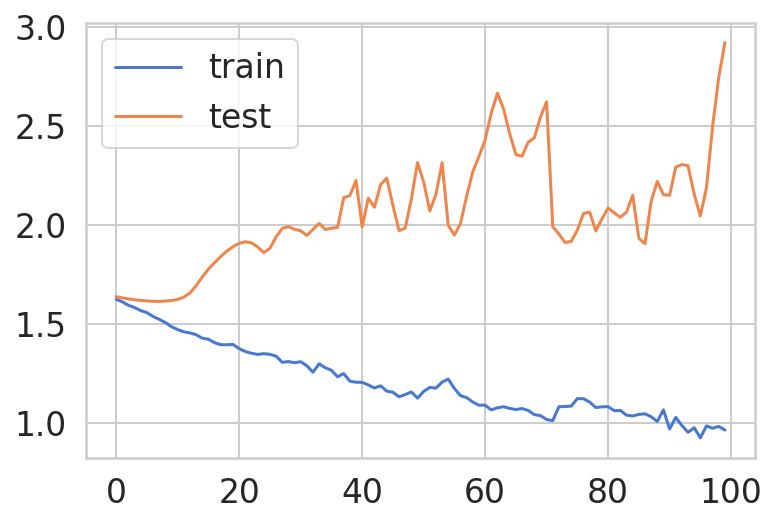

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [13]:
model.evaluate(X_test, y_test)

49/49 [==============================] - 0s 3ms/sample - loss: 1.8270 - acc: 0.2653


[1.8270119161021954, 0.26530612]

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
    
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(18, 16)) 
    ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
    )

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

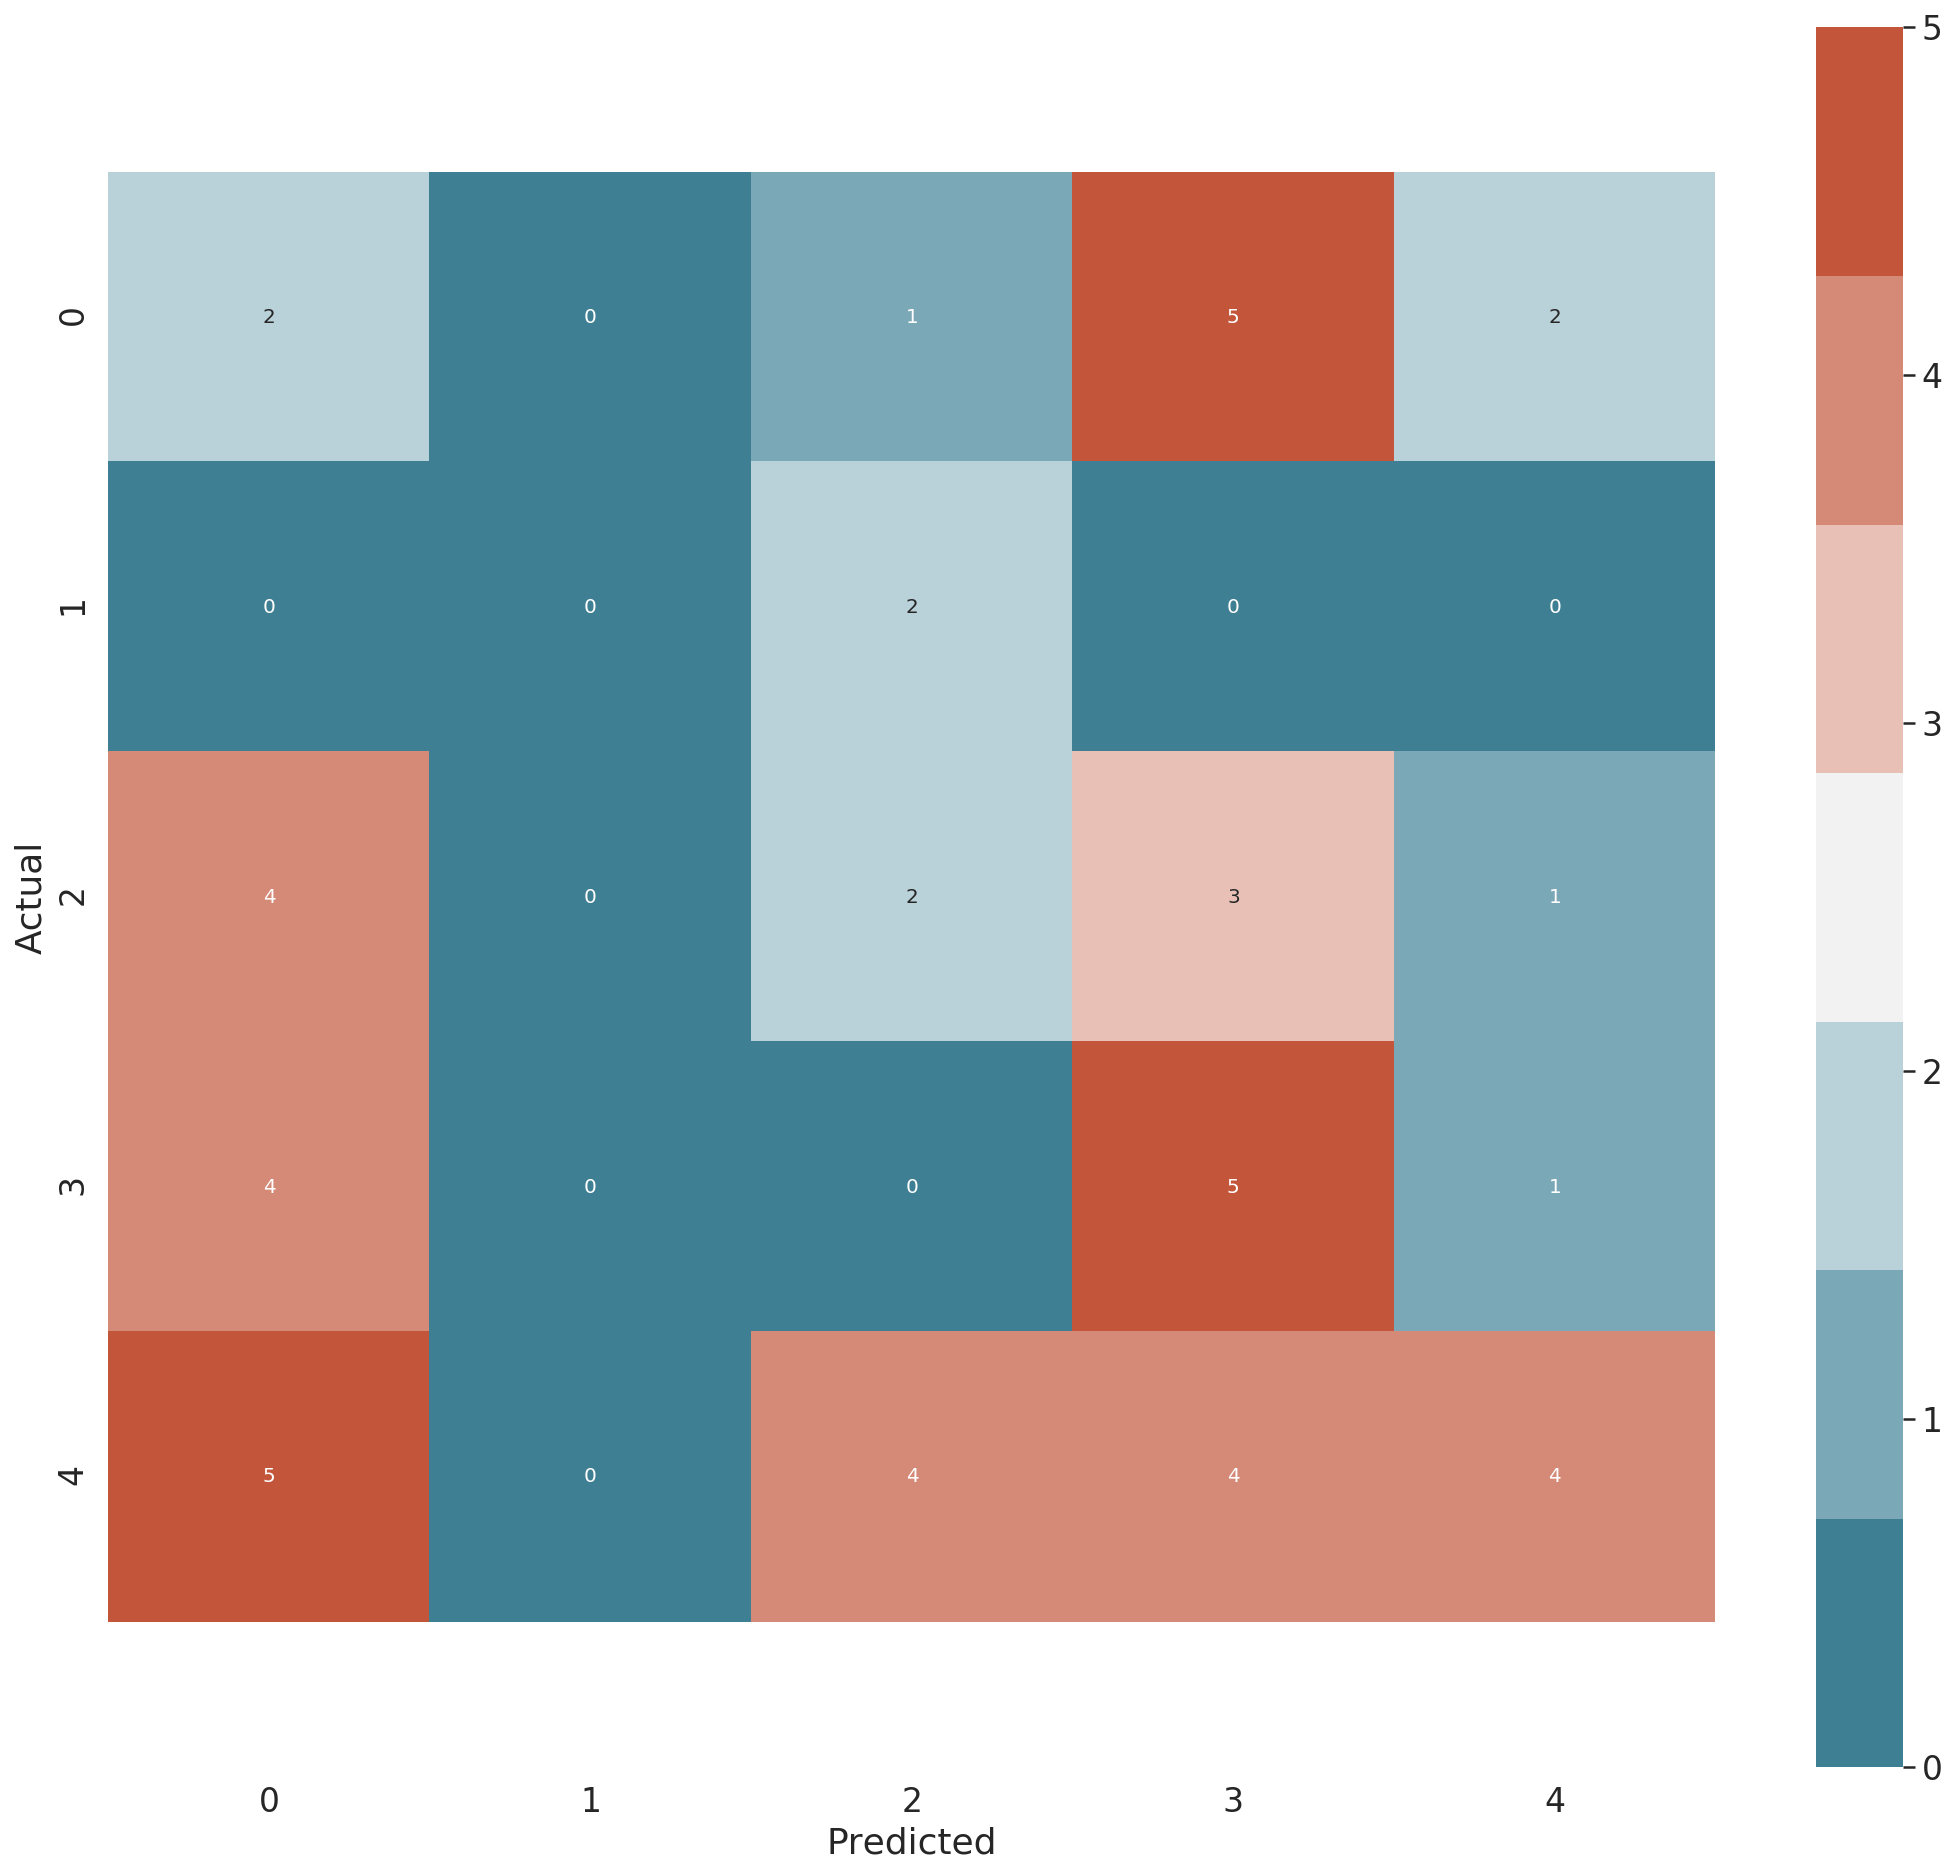

In [15]:
plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)